### Instituto Tecnológico de Costa Rica (ITCR)
### Escuela de Computación
### Curso: Inteligencia Artificial
 
### Segunda tarea programada 2022-I


Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual o en grupos de máximo dos personas.

---


Objetivo: En el presente trabajo se repasarán conceptos elementales respecto a optimización, aprendizaje profundo y regresión.


**Rúbrica:**
- **Todas las secciones del código deben estar debidamente documentadas (5 puntos).**
- **Deben incluir las referencias del material utilizado (3 puntos)**
- **No deben tener errores de redacción u ortografía. (2 puntos)**
- **El resto de la rúbrica está incluida en las definición de los ejercicios.**

---


In [134]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from pandas import read_csv, notnull
from numpy import sqrt
from numpy import vstack

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
import torch.nn.functional as F
from torch import nn
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_

## Pregunta 1. Graficación

---

Para las siguientes:

Función 1:

$f_{1}\left(x_{1},x_{2}\right)=\left(x_{1}-0.7\right)^{2}+\left(x_{2}-0.5\right)^{2}$


Función 2: 

$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$


Realice lo siguiente (5 puntos):

En Python, cree una función que le permita graficar las funciones anteriores. Utilizando la función en Python genere dos gráficos, uno para cada función $𝑓_{1}$ y  $𝑓_{2}$. 

## Pregunta 2. Optimización
---

**a) Vector gradiente  (5 puntos)**

Calcule el vector gradiente $\nabla f$ para la siguiente función multi-variable $f: \mathbb{R}^2\rightarrow\mathbb{R}$. Además, evalúelo en $\begin{bmatrix}1\\1\end{bmatrix}$ y $\begin{bmatrix}-1\\-1\end{bmatrix}$. 

--No se require programación en python--.

 - $f_3(x,y) = x^4+y^3+5x^2y^3$
 


**b) Descenso de gradiente (10 puntos)**

**Sea la función:** 

\begin{equation}
f_4\left(\overrightarrow{x}\right)=(x-0.7)^{2}+(y-0.5)^{2},
\end{equation}


**Implemente el algoritmo de descenso de gradiente para $f_4(x)$ en la función en Python denominada: (8 puntos)**

$$funcion\_gradient\_descent \left(learning\_rate, max\_iters, starting\_point, f\_function,f\_gradient, precision\right)$$

donde los parámetros corresponden a:

* learning_rate: tasa_aprendizaje o el $\alpha$
* max_iters: es el máximo número de iteraciones a ejecutar
* starting_point: es el vector con los dos valores iniciales [x,y]
* f_function: fución a optimizar
* f_gradient: gradiente de la función a optimizar.
* precision: es el valor mínimo para un cambio entre iteración. 

Despliegue y analice los resultados (2 puntos).


## Pregunta 3. Análisis de regresión con aprendizaje profundo (con PyTorch)

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset (copia adjunta).   

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscópio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

Dado el conjunto de datos de abulones se **desea crear un modelo de regresión utilizando un perceptrón multicapa para predecir la cantidad de anillos (columna Rings) de estos a partir del conjunto de características**.

Realice lo siguiente:

(requisito indispensable para tomar en cuenta el ejercicio, deben usar PyTorch).
- a) (1 punto) Describa el conjunto de datos, cada uno de sus campos y referencie la fuente. 
- b) Cargue el conjunto de datos.
- c) (3 puntos) Explore y limpie el conjunto de datos, visualice algunas estadísticas, presente una matriz de calor y verifique que no existan valores faltantes.
- d) (5 puntos) Defina el modelo utilizando un perceptrón multicapa implementado con PyTorch.
- e) (5 puntos) Realice el entrenamiento del modelo.
- f) (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
- g) (2 puntos) Prepare un ejemplo de uso del modelo seleccionado y explique el resultado.
- h) (5 puntos) Realice al menos tres conclusiones sobre el ejercicio.


In [135]:
# utility functions

# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        """
        The __init__ function is run once when instantiating the Dataset object. 
        :param path: the path and name of the file to process. 
        """
        # load the csv file as a dataframe
        df = read_csv(path, header=0)
        # store the inputs and outputs
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        # ensure target has the right shape
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        """
        The __len__ function returns the number of samples in our dataset.
        """
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        """
        The __getitem__ function loads and returns 
        a sample from the dataset at the given index idx. 
        :param idx: index.
        """
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        """
        Split the dataset into training and test data.
        :param n_test: training data percentage
        """
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

    
def prepare_data(path):
    """
    Prepare the dataset.
    :param path: path and name of the file .
    """
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl


def evaluate_model(test_dl, model):
    """
    Evaluates the model performance using Mean Squared Error (MSE).
    :param: test_dt: test data.
    :param: model: model to evaluate.
    """
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate mse
    mse = mean_squared_error(actuals, predictions)
    return mse


def predict(row, model):
    """
    Make a class prediction for one row of data
    """

    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

a) 
Los datos describen la morfologia de una especie de molusco llamados abulones, los datos pretenden relacionar y predecir la edad de los abulones en base en los anillos que tienen,
los datos que tenemos son el largo del abulon, el diametro el cual es la medida perpendicular al largo, 


In [136]:
#b)
df1 = pd.read_csv('./datos/abalone.csv', index_col=0)
df1.head()


,Diameter,Height,Whole,Viscera,Shellweight,Rings
Length,,,,,,
0.745,0.585,0.215,2.4990,0.4720,0.700,17
0.740,0.600,0.195,1.9740,0.4085,0.710,16
0.735,0.590,0.225,1.7560,0.3405,0.580,21
0.730,0.595,0.230,2.8255,0.4190,0.897,17
0.725,0.560,0.210,2.1410,0.3980,1.005,18


         Diameter      Height       Whole     Viscera  Shellweight  \
count  987.000000  987.000000  987.000000  987.000000   987.000000   
mean     0.383678    0.133131    0.712899    0.155166     0.218105   
std      0.101893    0.039270    0.454114    0.097596     0.144131   
min      0.055000    0.010000    0.002000    0.000500     0.001500   
25%      0.322500    0.105000    0.354500    0.074000     0.105000   
50%      0.400000    0.135000    0.663000    0.146000     0.200000   
75%      0.455000    0.160000    0.996500    0.220250     0.305000   
max      0.600000    0.240000    2.825500    0.541000     1.005000   

             Rings  
count   987.000000  
mean     19.567376  
std     290.580810  
min   -1300.000000  
25%       8.000000  
50%      10.000000  
75%      13.000000  
max    9000.000000  


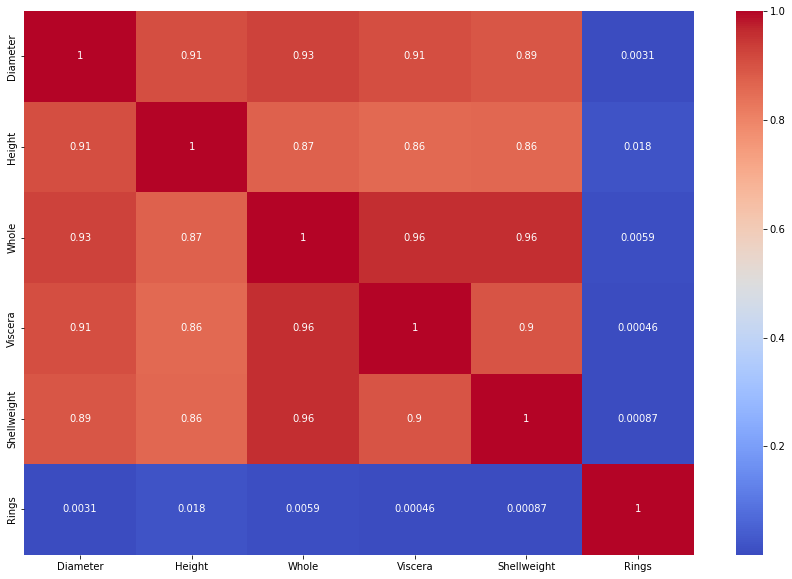

In [137]:
# c)

#  # limpieza de datos 
#df1 = df1[pd.notnull(df1['Length'])]
df1 = df1[pd.notnull(df1['Diameter'])]
df1 = df1[pd.notnull(df1['Height'])]
df1 = df1[pd.notnull(df1['Whole'])]
df1 = df1[pd.notnull(df1['Viscera'])]
df1 = df1[pd.notnull(df1['Shellweight'])]
df1 = df1[pd.notnull(df1['Rings'])]

#df1= df1[df1['Length'] != 0]
df1= df1[df1['Diameter'] != 0]
df1= df1[df1['Height'] != 0]
df1= df1[df1['Whole'] != 0]
df1= df1[df1['Viscera'] != 0]
df1= df1[df1['Shellweight'] != 0]



# a = df1.loc[~df1.index.duplicated(), :]# eliminamos los indices repetidos
# print(a)



def statistics(data):
    stat = data.describe()
    print(stat)



def mapaCalor(df1):
    _,ax=plt.subplots(figsize=(15,10))
    #colormap=sns.diverging_palette(115,255,as_cmap=True)
    sns.heatmap(abs(df1.corr()),annot=True,cmap="coolwarm")

statistics(df1)

mapaCalor(df1)

In [138]:
#d)

# model definition
class MLP(nn.Module):
    """
    Class that implements the perceptron, it extends the Module class.
    """
    # define model elements
    def __init__(self, n_inputs=6, n_output=1):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        # Values are scaled by the gain parameter using a uniform distribution.
        # No gradient will be recorded for this operation.
        xavier_uniform_(self.hidden1.weight)
        self.act1 = Sigmoid()
        # second hidden layer
        self.hidden2 = Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()
        # third hidden layer and output
        self.hidden3 = Linear(8, n_output)
        xavier_uniform_(self.hidden3.weight)

    def forward(self, X):
        """
        Forward run of the network using the data in X.
        """
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        return X
        

model = MLP()
print (model)



MLP(
  (hidden1): Linear(in_features=6, out_features=10, bias=True)
  (act1): Sigmoid()
  (hidden2): Linear(in_features=10, out_features=8, bias=True)
  (act2): Sigmoid()
  (hidden3): Linear(in_features=8, out_features=1, bias=True)
)


In [139]:
#e)
def train_model(train_dl, model):
    """
    Train the model using the train data loader (train_dl).
    """
    
    # define the optimization
    # Mean Squared Error (MSE)
    criterion = MSELoss()
    # Stochastic gradient descent (SGD)
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()


# prepare the data
path = 'datos\Abalone.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
print(train_dl)

# train the model
train_model(train_dl, model)



661 326


In [140]:
#f)

# evaluate the model using the Mean Squared Error (MSE)
mse = evaluate_model(test_dl, model)
print('Error Cuadratico Medio: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))

Error Cuadratico Medio: 34.182, RMSE: 5.847


In [141]:
#g)
# make a single prediction
row = [0.74,0.6,0.612,2.974,0.4085,0.44]
yhat = predict(row, model)
print('Predicted: %.3f' % yhat)

Predicted: 6.879


## Pregunta 4. Ajuste de curvas con mínimos cuadrados.
(requisito indispensable para tomar en cuenta el ejercicio, deben usar tensores de PyTorch).
- a) (5 puntos) Calcule el $w_{opt}$ (el w óptimo) para los datos de los abulones. 
- b) (5 puntos) Implemente la función forward, la cual estima las salidas del modelo al hacer  $f(x) =X\,\vec{w}_{opt}$ donde la función f(x) se refiere a la función de activación, con X la matriz de características.
- c) (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
- d) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.

## Pregunta 5. Implemente un perceptrón de una capa 

(requisito indispensable para tomar en cuenta el ejercicio, deben usar tensores de PyTorch).

- a)(10 puntos) Implemente el algoritmo del perceptrón de una capa rescindiendo al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales. Debe implementarlo sin utilizar ninguna biblioteca, es decir en PyTorch no se puede usar ninguna clase o funcionalidad desarrollada por PyTorch o alguna otra biblioteca.
- b)(5 puntos) Utilice el perceptrón desarrollado en a) para realizar regresión con los datos de los abulones.
- c) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.